## Analysis and Plots

#### Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cartopy.mpl.gridliner as gridliner
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
%matplotlib inline
import time

In [2]:
start_time=time.time()

path = '/storage2/tkyeimiah'


aice_dh1 = xr.open_dataset(path+'/iHESP/EM1/hist/aice_hist/final_hist.nc')
aice_dp1 = xr.open_dataset(path+'/iHESP/EM1/proj/aice_proj/final_proj.nc')

hi_dh = xr.open_dataset(path+'/iHESP/EM1/hist/hi_hist/hi_hist.nc')
hi_dp = xr.open_dataset(path+'/iHESP/EM1/proj/hi_proj/hi_proj.nc')


end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.8253931999206543 seconds


### CESM-HR

In [4]:
aice_hist=aice_dp1['aice']
aice_proj=aice_dh1['aice']

In [5]:
aice_hist_region = aice_hist
aice_proj_region = aice_proj

### CESM2-LE

In [8]:
start_time=time.time()

Cesm_lr=xr.open_dataset(path+'/CESM2-LE/aice/EM_1001.nc')

end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 0.07915496826171875 seconds


In [9]:
aice_lr=Cesm_lr['aice']
tarea_lr=Cesm_lr['uarea']

In [10]:
# Define the Labrador coast boundaries (replace these with your desired region)
lon_min, lon_max =0, 360 #73W & 45W
lat_min, lat_max =30,90

# Create a mask for Labrador coast 
mask_lr = ((aice_lr.TLAT >= lat_min) & (aice_lr.TLAT <= lat_max) &
        (aice_lr.TLON >= lon_min) & (aice_lr.TLON <= lon_max))

mask_lr2 = ((tarea_lr.TLAT >= lat_min) & (tarea_lr.TLAT <= lat_max) &
        (tarea_lr.TLON >= lon_min) & (tarea_lr.TLON <= lon_max))

# Apply the mask to the aice variable
aice_lr_region_ =aice_lr.where(mask_lr, drop=True)
tarea_lr_region_=tarea_lr.where(mask_lr2, drop=True)

In [11]:
sic_greater_lr_15 = xr.where(aice_lr_region_ >= 0.15, 1, 0)
aice_lr_region = (sic_greater_lr_15 * tarea_lr_region_)/1e12

### PLOT SECTION

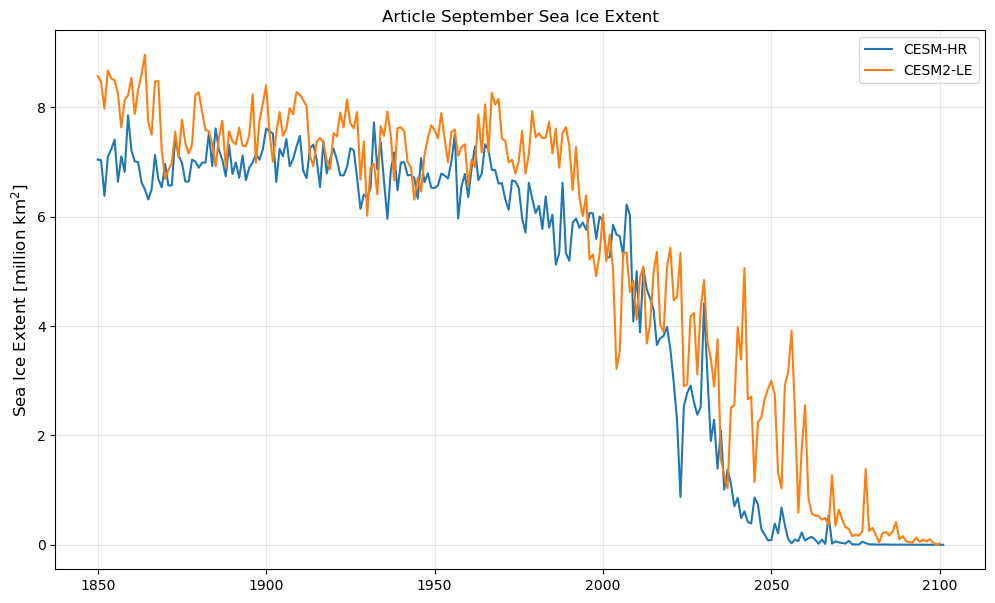

Execution time:  0.0 hours, 1.0 minutes, 34.7247052192688 seconds


In [19]:
start_time = time.time()

sep_aice_hist = aice_hist_region.sel(time=slice('1850','2100'))[7::12].sum(('nj', 'ni'))
sep_aice_proj = aice_proj_region.sel(time=slice('1850','2100'))[7::12].sum(('nj', 'ni'))
sep_aice=xr.concat([sep_aice_hist,sep_aice_proj], dim='time')

sep_aice_lr = aice_lr_region.sel(time=slice('1850','2100'))[7::12].sum(('nj', 'ni'))


fig, ax = plt.subplots(1, 1, figsize=(12, 7), sharex=True)
years =np.arange(1850,2102)
yearss =np.arange(1850,2101)

# First plot              
ax.plot(years, sep_aice, label='CESM-HR')
ax.plot(yearss, sep_aice_lr, label='CESM2-LE')
ax.set_title('Article September Sea Ice Extent')
ax.set_ylabel('Sea Ice Extent [million km$^2$]', fontsize=12)
ax.legend(loc='upper right')
ax.grid(alpha=0.3)
                 

plt.subplots_adjust(hspace=0.05)
plt.savefig('Fig3.jpg', dpi=300, bbox_inches='tight')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")


In [21]:
aice_hist_region.sel(time=slice('1850','2100'))[7::12]

<xarray.DataArray 'aice' (time: 157, nj: 906, ni: 3376)>
[480208992 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-09-01 00:00:00 ... 2006-09-01 00:00:00
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Attributes:
    long_name:     ice area  (aggregate)
    units:         %
    comment:       none
    cell_methods:  time: mean
    time_rep:      averaged